# Assignment1:Introductory tour and decision trees[Fixed version]
### Group 12: Guangyu Ma,Yanping Tang,Weiyou Wang
### Jan 2025

# Task 1

* Read data from the CSV file as described in the intrrduction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file.
data = pd.read_csv('CTG.csv', skiprows=1)

# Select the relevant numerical columns.
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
                 'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
                 'Median', 'Variance', 'Tendency', 'NSP']
data = data[selected_cols].dropna()

# Shuffle the dataset.
data_shuffled = data.sample(frac=1.0, random_state=0)

# Split into input part X and output part Y.
X = data_shuffled.drop('NSP', axis=1)

# Map the diagnosis code to a human-readable label.
def to_label(y):
    return [None, 'normal', 'suspect', 'pathologic'][(int(y))]

Y = data_shuffled['NSP'].apply(to_label)

# Partition the data into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

* show the data in X

In [2]:
X.head(10)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,...,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency
658,130.0,1.0,0.0,3.0,0.0,0.0,0.0,24.0,1.2,12.0,...,35.0,120.0,155.0,1.0,0.0,134.0,133.0,135.0,1.0,0.0
1734,134.0,9.0,1.0,8.0,5.0,0.0,0.0,59.0,1.2,0.0,...,109.0,80.0,189.0,6.0,0.0,150.0,146.0,150.0,33.0,0.0
1226,125.0,1.0,0.0,4.0,0.0,0.0,0.0,43.0,0.7,31.0,...,21.0,120.0,141.0,0.0,0.0,131.0,130.0,132.0,1.0,0.0
1808,143.0,0.0,0.0,1.0,0.0,0.0,0.0,69.0,0.3,6.0,...,27.0,132.0,159.0,1.0,0.0,145.0,144.0,146.0,1.0,0.0
825,152.0,0.0,0.0,4.0,0.0,0.0,0.0,62.0,0.4,59.0,...,25.0,136.0,161.0,0.0,0.0,159.0,156.0,158.0,1.0,1.0
1440,146.0,8.0,0.0,4.0,0.0,0.0,0.0,37.0,0.9,0.0,...,52.0,126.0,178.0,0.0,0.0,155.0,153.0,155.0,4.0,0.0
1996,125.0,0.0,0.0,6.0,7.0,0.0,0.0,62.0,1.3,0.0,...,70.0,68.0,138.0,6.0,0.0,128.0,117.0,124.0,25.0,1.0
905,146.0,0.0,0.0,4.0,3.0,0.0,0.0,30.0,1.1,0.0,...,59.0,99.0,158.0,3.0,0.0,147.0,143.0,147.0,5.0,1.0
386,129.0,5.0,39.0,2.0,0.0,0.0,0.0,36.0,1.5,0.0,...,99.0,99.0,198.0,3.0,1.0,186.0,163.0,169.0,106.0,1.0
251,130.0,0.0,8.0,5.0,0.0,0.0,0.0,67.0,0.5,22.0,...,84.0,72.0,156.0,12.0,0.0,143.0,140.0,143.0,4.0,1.0


* Use DummyClassifier as a baseline

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

clf = DummyClassifier(strategy='most_frequent')
cross_val_score(clf, Xtrain, Ytrain)

array([0.78235294, 0.78235294, 0.77941176, 0.77941176, 0.77941176])

* Use 7 different classifiers and find the most accurate result, which is GradientBoostingClassifier

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

classifiers = {
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "Perceptron": Perceptron(),
    "LogisticRegression": LogisticRegression(max_iter=10000),
    "LinearSVC": LinearSVC(max_iter=10000),
    "MLPClassifier": MLPClassifier(max_iter=10000)
}

for name, clf in classifiers.items():
    if name in ["DecisionTreeClassifier","RandomForestClassifier","GradientBoostingClassifier"]:
        scores = cross_val_score(clf, Xtrain, Ytrain, cv=5)
    else:
        #for linear model, scale data,otherwise it will have ConvergenceWarning
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(Xtrain)
        scores = cross_val_score(clf, X_scaled, Ytrain, cv=5)
    print(f"{name}: {scores.mean():.3f}")

DecisionTreeClassifier: 0.928
RandomForestClassifier: 0.938
GradientBoostingClassifier: 0.949
Perceptron: 0.873
LogisticRegression: 0.891
LinearSVC: 0.891
MLPClassifier: 0.932


* Train it on the whole data set and get the result.
* It shows that the accuracy with GradientBoostingClassifier is 0.929


In [5]:
from sklearn.metrics import accuracy_score
clf = GradientBoostingClassifier()
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.9295774647887324


# Task 2

## Download the code that was shown during the lecture and use the defined class TreeClassifier as your classifier

In [6]:
import numpy as np
class DecisionTreeLeaf:

    def __init__(self, value):
        self.value = value

    # This method computes the prediction for this leaf node. This will just return a constant value.
    def predict(self, x):
        return self.value

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_id = str(node_counter)
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        graph.node(node_id, val_str, style='filled')
        return node_counter+1, node_id
        
    def __eq__(self, other):
        if isinstance(other, DecisionTreeLeaf):
            return self.value == other.value
        else:
            return False
        
    def to_str(self, indent, lines, names):
        val_str = f'{self.value:.4g}' if isinstance(self.value, float) else str(self.value)
        lines.append(' '*indent + val_str)

class DecisionTreeBranch:

    def __init__(self, feature, threshold, low_subtree, high_subtree):
        self.feature = feature
        self.threshold = threshold
        self.low_subtree = low_subtree
        self.high_subtree = high_subtree

    # For a branch node, we compute the prediction by first considering the feature, and then 
    # calling the upper or lower subtree, depending on whether the feature is or isn't greater
    # than the threshold.
    def predict(self, x):
        if x[self.feature] <= self.threshold:
            return self.low_subtree.predict(x)
        else:
            return self.high_subtree.predict(x)

    # Utility function to draw a tree visually using graphviz.
    def draw_tree(self, graph, node_counter, names):
        node_counter, low_id = self.low_subtree.draw_tree(graph, node_counter, names)
        node_counter, high_id = self.high_subtree.draw_tree(graph, node_counter, names)
        node_id = str(node_counter)
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lbl = f'{fname} > {self.threshold:.4g}?'
        graph.node(node_id, lbl, shape='box', fillcolor='yellow', style='filled, rounded')
        graph.edge(node_id, low_id, 'False')
        graph.edge(node_id, high_id, 'True')
        return node_counter+1, node_id
        
    def to_str(self, indent, lines, names):
        pad = ' '*indent
        fname = f'F{self.feature}' if names is None else names[self.feature]
        lines.append(pad + f'{fname} <= {self.threshold:.3g}?')
        lines.append(pad + '  True =>')
        self.low_subtree.to_str(indent+4, lines, names)
        lines.append(pad + '  False =>')
        self.high_subtree.to_str(indent+4, lines, names)
        

from graphviz import Digraph
from sklearn.base import BaseEstimator, ClassifierMixin
from abc import ABC, abstractmethod

class DecisionTree(ABC, BaseEstimator):

    def __init__(self, max_depth):
        super().__init__()
        self.max_depth = max_depth
        
    # As usual in scikit-learn, the training method is called *fit*. We first process the dataset so that
    # we're sure that it's represented as a NumPy matrix. Then we call the recursive tree-building method
    # called make_tree (see below).
    def fit(self, X, Y):
        if isinstance(X, pd.DataFrame):
            self.names = X.columns
            X = X.to_numpy()
        elif isinstance(X, list):
            self.names = None
            X = np.array(X)
        else:
            self.names = None
        Y = np.array(Y)        
        self.root = self.make_tree(X, Y, self.max_depth)
        
    def draw_tree(self):
        graph = Digraph()
        self.root.draw_tree(graph, 0, self.names)
        return graph
    
    # By scikit-learn convention, the method *predict* computes the classification or regression output
    # for a set of instances.
    # To implement it, we call a separate method that carries out the prediction for one instance.
    def predict(self, X):
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy()
        return [self.predict_one(x) for x in X]

    # Predicting the output for one instance.
    def predict_one(self, x):
        return self.root.predict(x)        

    # This is the recursive training 
    def make_tree(self, X, Y, max_depth):

        # We start by computing the default value that will be used if we'll return a leaf node.
        # For classifiers, this will be the most common value in Y.
        default_value = self.get_default_value(Y)

        # First the two base cases in the recursion: is the training set completely
        # homogeneous, or have we reached the maximum depth? Then we need to return a leaf.

        # If we have reached the maximum depth, return a leaf with the majority value.
        if max_depth == 0:
            return DecisionTreeLeaf(default_value)

        # If all the instances in the remaining training set have the same output value,
        # return a leaf with this value.
        if self.is_homogeneous(Y):
            return DecisionTreeLeaf(default_value)

        # Select the "most useful" feature and split threshold. To rank the "usefulness" of features,
        # we use one of the classification or regression criteria.
        # For each feature, we call best_split (defined in a subclass). We then maximize over the features.
        n_features = X.shape[1]
        
        _, best_feature, best_threshold = \
            max(self.best_split(X, Y, feature) 
                for feature in range(n_features))
        
        if best_feature is None:
            return DecisionTreeLeaf(default_value)

        # Split the training set into subgroups, based on whether the selected feature is greater than
        # the threshold or not
        X_low, X_high, Y_low, Y_high = \
            self.split_by_feature(X, Y, best_feature, best_threshold)

        # Build the subtrees using a recursive call. Each subtree is associated
        # with a value of the feature.
        low_subtree = self.make_tree(X_low, Y_low, max_depth-1)
        high_subtree = self.make_tree(X_high, Y_high, max_depth-1)

        if low_subtree == high_subtree:
            return low_subtree

        # Return a decision tree branch containing the result.
        return DecisionTreeBranch(best_feature, best_threshold, low_subtree, high_subtree)
    
    # Utility method that splits the data into the "upper" and "lower" part, based on a feature
    # and a threshold.
    def split_by_feature(self, X, Y, feature, threshold):
        low = X[:,feature] <= threshold
        high = ~low
        return X[low], X[high], Y[low], Y[high]
    
    def __str__(self):
        lines = []
        self.root.to_str(0, lines, self.names)
        return '\n'.join(lines)
    
    # The following three methods need to be implemented by the classification and regression subclasses.
    
    @abstractmethod
    def get_default_value(self, Y):
        pass

    @abstractmethod
    def is_homogeneous(self, Y):
        pass

    @abstractmethod
    def best_split(self, X, Y, feature):
        pass
from collections import Counter

class TreeClassifier(DecisionTree, ClassifierMixin):

    def __init__(self, max_depth=10, criterion='maj_sum'):
        super().__init__(max_depth)
        self.criterion = criterion
        
    def fit(self, X, Y):
        # For decision tree classifiers, there are some different ways to measure
        # the homogeneity of subsets.
        if self.criterion == 'maj_sum':
            self.criterion_function = majority_sum_scorer
        elif self.criterion == 'info_gain':
            self.criterion_function = info_gain_scorer
        elif self.criterion == 'gini':
            self.criterion_function = gini_scorer
        else:
            raise Exception(f'Unknown criterion: {self.criterion}')
        super().fit(X, Y)
        self.classes_ = sorted(set(Y))

    # Select a default value that is going to be used if we decide to make a leaf.
    # We will select the most common value.
    def get_default_value(self, Y):
        self.class_distribution = Counter(Y)
        return self.class_distribution.most_common(1)[0][0]
    
    # Checks whether a set of output values is homogeneous. In the classification case, 
    # this means that all output values are identical.
    # We assume that we called get_default_value just before, so that we can access
    # the class_distribution attribute. If the class distribution contains just one item,
    # this means that the set is homogeneous.
    def is_homogeneous(self, Y):
        return len(self.class_distribution) == 1
        
    # Finds the best splitting point for a given feature. We'll keep frequency tables (Counters)
    # for the upper and lower parts, and then compute the impurity criterion using these tables.
    # In the end, we return a triple consisting of
    # - the best score we found, according to the criterion we're using
    # - the id of the feature
    # - the threshold for the best split
    def best_split(self, X, Y, feature):

        # Create a list of input-output pairs, where we have sorted
        # in ascending order by the input feature we're considering.
        sorted_indices = np.argsort(X[:, feature])        
        X_sorted = list(X[sorted_indices, feature])
        Y_sorted = list(Y[sorted_indices])

        n = len(Y)

        # The frequency tables corresponding to the parts *before and including*
        # and *after* the current element.
        low_distr = Counter()
        high_distr = Counter(Y)

        # Keep track of the best result we've seen so far.
        max_score = -np.inf
        max_i = None

        # Go through all the positions (excluding the last position).
        for i in range(0, n-1):

            # Input and output at the current position.
            x_i = X_sorted[i]
            y_i = Y_sorted[i]
            
            # Update the frequency tables.
            low_distr[y_i] += 1
            high_distr[y_i] -= 1

            # If the input is equal to the input at the next position, we will
            # not consider a split here.
            #x_next = XY[i+1][0]
            x_next = X_sorted[i+1]
            if x_i == x_next:
                continue

            # Compute the homogeneity criterion for a split at this position.
            score = self.criterion_function(i+1, low_distr, n-i-1, high_distr)

            # If this is the best split, remember it.
            if score > max_score:
                max_score = score
                max_i = i

        # If we didn't find any split (meaning that all inputs are identical), return
        # a dummy value.
        if max_i is None:
            return -np.inf, None, None

        # Otherwise, return the best split we found and its score.
        split_point = 0.5*(X_sorted[max_i] + X_sorted[max_i+1])
        return max_score, feature, split_point
def majority_sum_scorer(n_low, low_distr, n_high, high_distr):
    maj_sum_low = low_distr.most_common(1)[0][1]
    maj_sum_high = high_distr.most_common(1)[0][1]
    return maj_sum_low + maj_sum_high
    
def entropy(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return -sum(p*np.log2(p) if p > 0 else 0 for p in ps)

def info_gain_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*entropy(low_distr)+n_high*entropy(high_distr))/(n_low+n_high)

def gini_impurity(distr):
    n = sum(distr.values())
    ps = [n_i/n for n_i in distr.values()]
    return 1-sum(p**2 for p in ps)
    
def gini_scorer(n_low, low_distr, n_high, high_distr):
    return -(n_low*gini_impurity(low_distr)+n_high*gini_impurity(high_distr))/(n_low+n_high)

* Try to find the best appropriate depth for thr DecisionTressClassifier
* Firstly,try to use the TreeClassifier
* how about 10 depth?

In [7]:
scores_ts2_10 = cross_val_score(TreeClassifier(max_depth=10), Xtrain, Ytrain, cv=5)
print(scores_ts2_10)
print("means:%.3f" %(scores_ts2_10.mean()))

[0.92058824 0.92941176 0.91176471 0.9        0.9       ]
means:0.912


* test different depth from 1-20

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in range(1, 21):  # depth from 1-20
    clf = TreeClassifier(max_depth=depth)  # set current depth
    scores = cross_val_score(clf, Xtrain, Ytrain, cv=5)  # 5-fold
    print(f"Depth: {depth}, Scores: {scores}, Mean Accuracy: {scores.mean():.3f}")

Depth: 1, Scores: [0.84411765 0.83823529 0.84411765 0.81176471 0.82058824], Mean Accuracy: 0.832
Depth: 2, Scores: [0.90588235 0.90882353 0.88529412 0.87941176 0.87647059], Mean Accuracy: 0.891
Depth: 3, Scores: [0.91764706 0.91764706 0.89411765 0.88823529 0.88529412], Mean Accuracy: 0.901
Depth: 4, Scores: [0.92941176 0.92058824 0.91176471 0.89411765 0.9       ], Mean Accuracy: 0.911
Depth: 5, Scores: [0.92941176 0.91764706 0.91176471 0.89117647 0.89705882], Mean Accuracy: 0.909
Depth: 6, Scores: [0.92647059 0.92352941 0.90882353 0.89117647 0.89705882], Mean Accuracy: 0.909
Depth: 7, Scores: [0.92647059 0.92352941 0.90882353 0.89705882 0.89705882], Mean Accuracy: 0.911
Depth: 8, Scores: [0.92647059 0.92647059 0.9        0.89117647 0.89705882], Mean Accuracy: 0.908
Depth: 9, Scores: [0.92352941 0.93235294 0.90294118 0.9        0.89705882], Mean Accuracy: 0.911
Depth: 10, Scores: [0.92058824 0.92941176 0.91176471 0.9        0.9       ], Mean Accuracy: 0.912
Depth: 11, Scores: [0.9235294

* depth = 13/14, We got the best mean accuracy
* now apply the model on test set

In [9]:
clf = TreeClassifier(max_depth=13)
clf.fit(Xtrain, Ytrain)
Yguess = clf.predict(Xtest)
print(accuracy_score(Ytest, Yguess))

0.8732394366197183


* Visualize the tree.MAX_DEPTH=3

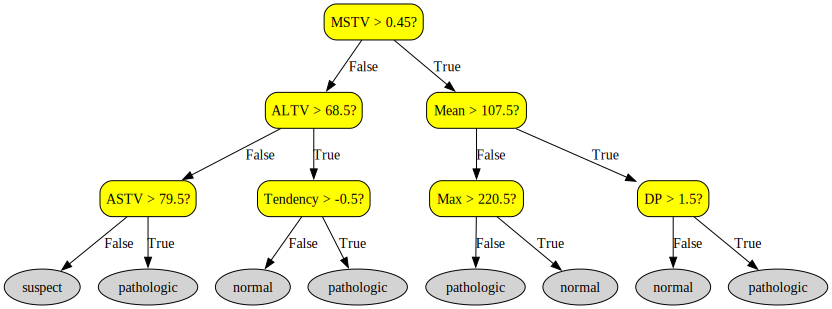

In [10]:
clf = TreeClassifier(max_depth=3)
clf.fit(Xtrain, Ytrain)
clf.draw_tree() #

# Task 3

In [11]:
# Read the CSV file using Pandas.
import numpy as np
alldata = pd.read_csv('sberbank.csv')

# Convert the timestamp string to an integer representing the year.
def get_year(timestamp):
    return int(timestamp[:4])
alldata['year'] = alldata.timestamp.apply(get_year)

# Select the 7 input columns and the output column.
selected_columns = ['price_doc', 'year', 'full_sq', 'life_sq', 'floor', 'num_room', 'kitch_sq', 'full_all']
alldata = alldata[selected_columns]
alldata = alldata.dropna()

# Shuffle.
alldata_shuffled = alldata.sample(frac=1.0, random_state=0)

# Separate the input and output columns.
X = alldata_shuffled.drop('price_doc', axis=1)
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)

# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [12]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
m1 = DummyRegressor()
cross_validate(m1, Xtrain, Ytrain, scoring='neg_mean_squared_error')

{'fit_time': array([0.00227618, 0.00139904, 0.00092793, 0.00081921, 0.00072503]),
 'score_time': array([0.00093389, 0.00073218, 0.00042295, 0.0003829 , 0.00036883]),
 'test_score': array([-0.39897319, -0.37113485, -0.38083108, -0.39057156, -0.40475168])}

* Try different kinds of regression models.
* By comparing the negetive mean squared error, we find that the GradientBoostingRegressor has the biggest value.So we choose  this method to train on the full training.   
* GradientBoostingRegressor:It is an integrated learning method for solving
* regression problems. It incrementally improves the performance
* of a model by iteratively training a series of weak learners
 (usually decision trees)

In [13]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

regressors = {
   "LinearRegression": LinearRegression(),
   "Ridge": Ridge(),
   "Lasso": Lasso(),
   "DecisionTreeRegressor": DecisionTreeRegressor(),
   "RandomForestRegressor": RandomForestRegressor(),
   "GradientBoostingRegressor": GradientBoostingRegressor(),
   "MLPRegressor": MLPRegressor(max_iter=10000)
}

for name, reg in regressors.items():
   scores = cross_validate(reg, Xtrain, Ytrain, scoring='neg_mean_squared_error')
   print(f"{name}: {scores['test_score'].mean():.3f} ")

LinearRegression: -0.301 
Ridge: -0.301 
Lasso: -0.301 
DecisionTreeRegressor: -0.527 
RandomForestRegressor: -0.284 
GradientBoostingRegressor: -0.265 
MLPRegressor: -124.164 


* By using the GradientBoostingRegressor on the full training set, the evaluation score of the held-out test is 0.2713.

In [14]:
from sklearn.metrics import mean_squared_error
regr = GradientBoostingRegressor()
regr.fit(Xtrain, Ytrain)
mean_squared_error(Ytest, regr.predict(Xtest))

0.2713647613107992

# Task4

## Step 2 Sanity check

In [15]:
def make_some_data(n):
    x = np.random.uniform(-5, 5, size=n)
    Y = (x > 1) + 0.1*np.random.normal(size=n)
    X = x.reshape(n, 1) 
    return X, Y

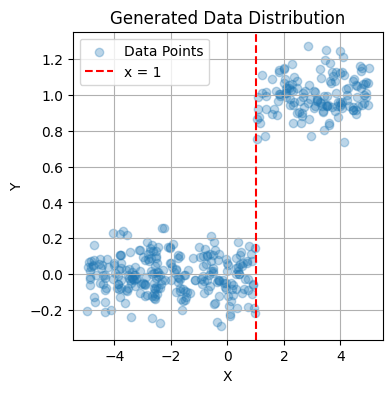

In [16]:
import matplotlib.pyplot as plt
n = 400
X, Y = make_some_data(n)
#Visualizing Data
plt.figure(figsize=(4, 4))
plt.scatter(X, Y, alpha=0.3, label="Data Points")
plt.axvline(x=1, color="r", linestyle="--", label="x = 1")
plt.title("Generated Data Distribution")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

### Very large and very small depths:
From the picture, we can see that if the depth is set very small,underfitting will occur, that is, the classifier cannot simulate the distribution of data well on the training set data points. When a larger distribution is set (depth=20), a curve that "perfectly" fits the distribution of training data will be obtained. This means that it has a high accuracy on the training set but may not be applicable to general situations. That is, overfitting.

In [17]:
#Use the sklearn DecisionTressRegressor model to train the data
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X, Y)
#difine a small depth
regressor_samll_dep = DecisionTreeRegressor(max_depth=1)
regressor_samll_dep.fit(X, Y)

DecisionTreeRegressor(max_depth=1)

In [18]:
#Generate the Test set,and use the model to predict
X_test = np.linspace(-5, 5, 500).reshape(-1, 1)
Y_pred = regressor.predict(X_test)

#use samll depth cli
Y_pred_small = regressor_samll_dep.predict(X_test)

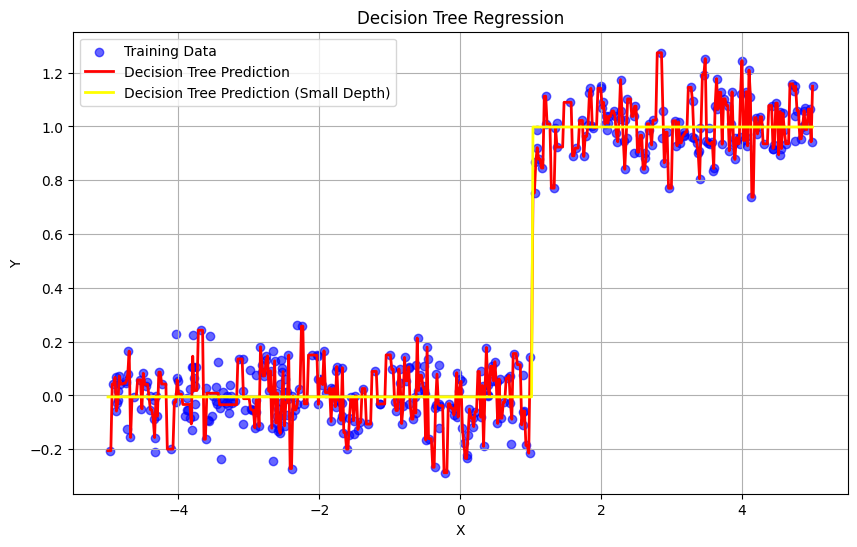

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color="blue", label="Training Data", alpha=0.6) #train data position
plt.plot(X_test, Y_pred, color="red", label="Decision Tree Prediction", linewidth=2)  # large depth prediction
plt.plot(X_test, Y_pred_small, color="yellow", label="Decision Tree Prediction (Small Depth)", linewidth=2)  # samll depth prediciton
plt.title("Decision Tree Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

## Step 3 Predicting apartment prices using decision tree regression
### Training result:
*   max_depth = 8
*   MSE=0.2984
*   R^2=0.2591



In [20]:
# Separate the input and output columns.
# alldata is the house data set
X = alldata_shuffled.drop('price_doc', axis=1) 
# For the output, we'll use the log of the sales price.
Y = alldata_shuffled['price_doc'].apply(np.log)
# Split into training and test sets.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
regressor_house = DecisionTreeRegressor(max_depth=1)
regressor_house.fit(Xtrain, Ytrain)
Ypred = regressor_house.predict(Xtest)
#evaluate
mse = mean_squared_error(Ytest, Ypred)
r2 = r2_score(Ytest, Ypred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.3410
R² Score: 0.1534


# Step 4 Underfitting and overfitting
* Very large depth: Overfitting occurs, i.e., on the right side of the image, the effect on the training set is very good (MSE is very low), but it is very poor on the test set.
* Very small depth: Underfitting occurs, i.e., on the left side of the image, the effect on both test sets is very poor.
* Best depth: 6
* This is because the model is trying too hard to fit the training set or not having enough training set features

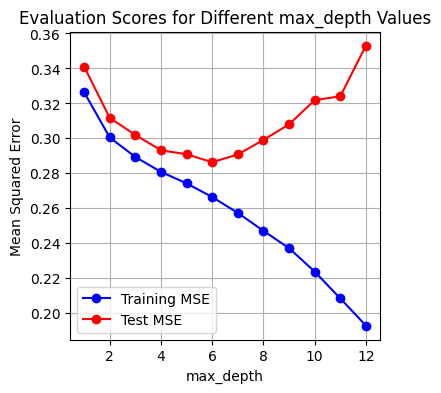

In [22]:
# Initialize lists to store scores
train_scores_list = []
test_scores_list = []
# Loop over max_depth values from 1 to 12
for depth in range(1, 13):
    #trian by different depth
    regressor = DecisionTreeRegressor(max_depth=depth)
    regressor.fit(Xtrain, Ytrain)

    # Evaluate on the training set
    Ytrain_pred = regressor.predict(Xtrain)
    train_mse = mean_squared_error(Ytrain, Ytrain_pred)
    train_scores_list.append(train_mse)

    # Evaluate on the test set
    Ytest_pred = regressor.predict(Xtest)
    test_mse = mean_squared_error(Ytest, Ytest_pred)
    test_scores_list.append(test_mse)

# Plot the results
plt.figure(figsize=(4, 4))
plt.plot(range(1, 13), train_scores_list, marker='o', label="Training MSE", color="blue")
plt.plot(range(1, 13), test_scores_list, marker='o', label="Test MSE", color="red")
plt.title("Evaluation Scores for Different max_depth Values")
plt.xlabel("max_depth")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()